### TL;DR
NumPy recently updated it's PRNG system. For now we suggest using [**these** functions](
https://docs.scipy.org/doc/numpy-1.17.0/reference/random/legacy.html#simple-random-data) like this:

In [1]:
import numpy as np
print(np.random.randint(0, 256, 10))

[139  34  41 181  54  58  88 237  12 134]



# Random number generation

The modeling of a lot of systems will require the use of random numbers. Unfortunately, these are quite difficult to generate on a purely deterministically working computer. While most modern devices actually *do* accumulate a pool of entropy from certain sources (like hardware timings), the stream of random bits is mainly useful for resourceful cryptographic applications. Running simulations, for examples of SDEs, requires much more randomness than ordinary hardware can provide.

Your options are either using specialized hardware, or incorporating a *Pseudo Random Number Generator* (PRNG).

A PRNG is a deterministic algorithm that generates sequences of numbers, that show properties and qualities of a "true" random sequence. If you are interested, you can take a look at statistical test suits like the [*Diehard tests*](https://en.wikipedia.org/wiki/Diehard_tests) to see what tests are typically performed to evaluate a PRNG.

## RANDU Linear Congruential Generator

A very simple class of PRNGs are *Linear Congruential Generators* (LCGs), which generate a sequence $(X_n)$ of integer values by using the following iteration:

\begin{equation}
X_{n+1} = (aX_n + c)\mod m.
\end{equation}

The parameters $a$, $c$ and $m$ define the specific LCG. You also need to provide $X_0$, which is called the ***seed***.

An infamous example of LCGs is *RANDU*, which was introduced on IBM's S/360 mainframes in the late 60s. A particular poor choice of parameters made RANDU one of the worst PRNGs that found alarmingly  widespread use. Let's implement it as a simple Python function:

In [2]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

def randu():
    randu.X = (65539 * randu.X) % 2**31
    return randu.X

Now generate a list of "random" values with the generator. We extract the lowest 2 bytes by using the bitwise *and*-operator `&` to demonstrate a particular poor performance of the generator in these 8 bits:

In [3]:
# Seeding the generator with the current time in seconds
randu.X = int(time())

X = []
for i in range(1000):
    X.append(randu() & 0xFF)

Plot a scatter diagram of all tuples $(X_n, X_{n+1})$ to reveal the correlation structure that these numbers possess. Depending on your seed you might see the tuples lining up, or even occupying only a handful of states at all. Run the generation multiple times to see the differences:

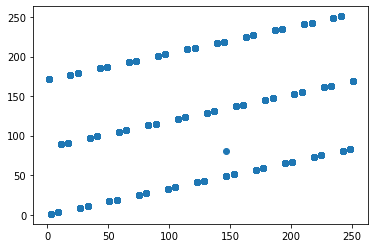

In [4]:
plt.scatter(X,np.roll(X,1))
plt.show()

Looking at the list, you will also observe that all numbers are either odd or even :-)

In [5]:
oddity = []

for x in X:
    if x % 2:
        oddity.append("even")
    else:
        oddity.append("odd")
        
print(oddity[:100])

['even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even', 'even']


These problems are not limited to the lowest 2 bytes, there are similar structures in the entire generator. However, they usually only become visible in tuples of higher dimensions.

Structures like these appear in all LCGs and not just in the lower bits. All LCG sequences will always fall onto *hyperplanes*, with the distance between the planes depending on the choice of parameters $a$, $c$ and $m$.

If you really need to use a LCG it's best to minimize the distance between the hyperplanes. You can read about optimal values in [L'Ecuyers "Tables of linear congruential generators of different sizes and good latice structure" (1999).](https://www.ams.org/journals/mcom/1999-68-225/S0025-5718-99-00996-5/S0025-5718-99-00996-5.pdf). There are, however, much better choices of PRNGs to use.

## Random numbers in NumPy
The most commonly used PRNGs are *Mersenne Twisters*. You'll find `MT19937` as the standard implementation in most languages and on most systems and in general it's good initial choice for most simulation purposes. However, you should always check that your results do not depend on your generator. Some more modern algorithms with even better statistical qualities include

* PCG (http://www.pcg-random.org/)
* XoShiRo (http://prng.di.unimi.it/)
* SFMT (http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/SFMT/index.html)

As of version 1.17 (July 2019) **NumPy reworked the `random` modules**. It now uses `PCG64` as it's new standard generator, with the ability to switch to other generators. Prior to 1.17, NumPy always used the Mersenne Twister `MT19937`. There were also numerous changes to the overall infrastructure of `random`.

Because the change is so new and many systems (like CIP Pool) are not yet updated to the newest NumPy version, we will use only the legacy functionality. If you ***just want to use NumPy, refer to the Docs on*** [Legacy Random Generation](https://docs.scipy.org/doc/numpy-1.17.0/reference/random/legacy.html#simple-random-data). These functions will work on 1.17 and on older version alike.



You can check your NumPy version with

In [6]:
np.version.version

'1.20.3'

On your own systems or the GWDG Jupyter service, you can upgrade your NumPy version in a terminal with the command

`pip install --upgrade numpy`

### Random uniform integers

First, for (a not so fair) comparison let's generate the 2 byte tuples again, now using NumPy's Mersenne Twister. The legacy generator is automatically seeded in the background on first call:

['odd', 'odd', 'odd', 'even', 'odd', 'even', 'even', 'even', 'odd', 'odd', 'even', 'even', 'odd', 'odd', 'odd', 'odd', 'even', 'odd', 'odd', 'even']


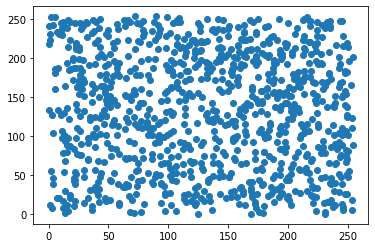

In [7]:
X = []
oddity = []
for i in range(1000):
    X.append(np.random.randint(0xff))

for x in X:
    if x % 2:
        oddity.append("even")
    else:
        oddity.append("odd")
        
print(oddity[:20])
plt.scatter(X,np.roll(X,1))
plt.show()

The faster, vectorized way of generating many integers is using `randint`'s `size` parameter:

In [8]:
X = np.random.randint(256, size=10**7)

You can directly draw a histogram using *Pyplot's* `hist` function:

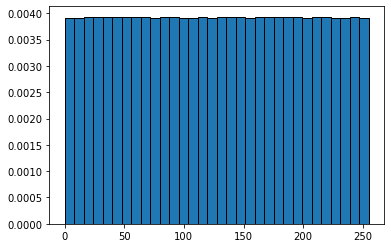

In [9]:
plt.hist(X, bins = 32, density = True, edgecolor='k')
plt.show()

If you need the histogram in numerical form, use `np.histogram`:

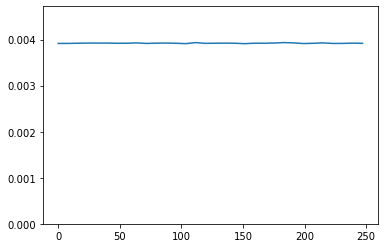

In [10]:
p, bins = np.histogram(X, bins=32, density = True)
plt.plot(bins[:-1],p) # Attention: using the bins left edge might not be what you want to do!
plt.ylim(0, 1.2*np.max(p))
plt.show()

### Choice

You can sample random elements from any array using `choice`:

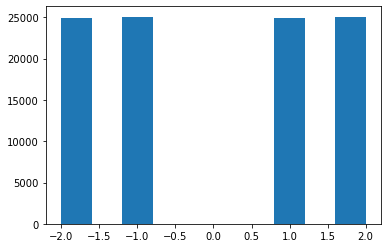

In [11]:
base_set = np.array([-2, -1, 1, 2])
choices = np.random.choice(base_set, size=10**5)

plt.hist(choices)
plt.show()

You may also provide custom probabilities:

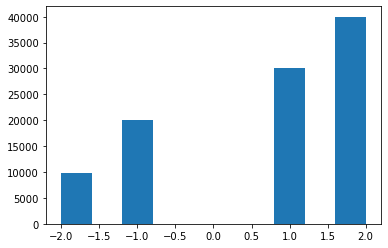

In [12]:
prob = np.array([0.1, 0.2, 0.3, 0.4])
choices = np.random.choice(base_set, size=10**5, p=prob)

plt.hist(choices)
plt.show()

### Random floats

Use `rand` to generate uniformly random floats in $[0,1)$:

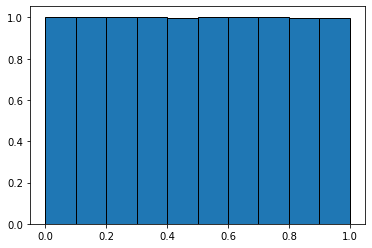

In [13]:
x = np.random.rand(10**6)

plt.hist(x, density = True, edgecolor='k')
plt.show()

If you need a different interval, shift and stretch the result to your needs:

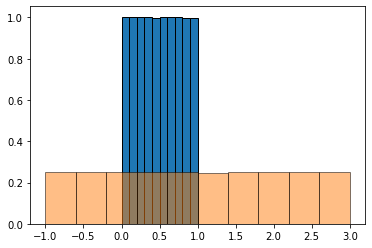

In [14]:
# Old data for comparison
plt.hist(x, density = True, edgecolor='k')

# Random numbers between -1 and 3
x = np.random.rand(10**6) * 4 - 1

plt.hist(x, density = True, edgecolor='k', alpha=0.5)
plt.show()

### Normal distribution

Use `randn` to draw samples from a standard normal distribution (zero mean, unit variance). You can shift and stretch the results to recover other gaussian distributions:

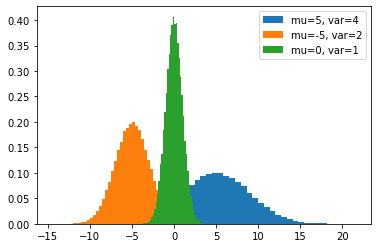

In [15]:
x1 = np.random.randn(10**5)
x2 = np.random.randn(10**5) * 2 - 5
x3 = np.random.randn(10**5) * 4 + 5

plt.hist(x3, density=True, bins=50, label="mu=5, var=4")
plt.hist(x2, density=True,  bins=50, label="mu=-5, var=2")
plt.hist(x1, density=True, bins=50, label="mu=0, var=1")

plt.legend()
plt.show()

NumPy provides [basic statistical functions](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html) to evaluate ensembles:

In [16]:
# Expectation values
mu1 = np.mean(x1)
mu2 = np.mean(x2)
mu3 = np.mean(x3)

# Standard deviations
std1 = np.std(x1)
std2 = np.std(x2)
std3 = np.std(x3)

You can mark these values with vertical bars:

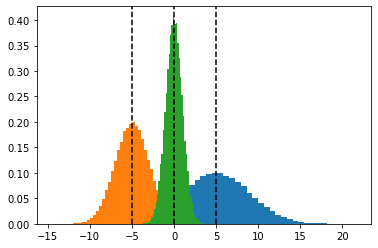

In [17]:
plt.hist(x3, density=True, bins=50, label="mu=5, var=4")
plt.hist(x2, density=True, bins=50, label="mu=-5, var=2")
plt.hist(x1, density=True, bins=50, label="mu=0, var=1")

plt.axvline(mu1, linestyle='--', c='k')
plt.axvline(mu2, linestyle='--', c='k')
plt.axvline(mu3, linestyle='--', c='k')